<img width="500" src="../Data/images/cover.png">


## Mid Bootcamp Project

### Social Effects on Study



To be successful a succesful student, one has to be talented, disciplined and study continuously and thoroughly to
achieve the best possible grades. Another factor for a successful school career however seems to be the students 
suroundings: one's family background, social background, health, relationship status, spare time, intrests, alcohol 
consumption, etc... The questions at hand is: What are the outside benefactors and obstacles for a student's 
successful performance in school?



This data approach student achievement in secondary education of two Portuguese schools. The data attributes include 
student grades, demographic, social and school related features) and it was collected by using school reports and 
questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and 
Portuguese language (por).


##### Column Description:

school:     student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex:        student's sex (binary: 'F' - female or 'M' - male)

age:        student's age (numeric: from 15 to 22)

address:    student's home address type (binary: 'U' - urban or 'R' - rural)

famsize:    family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus:    parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu:       mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ 
            secondary education or 4 â€“ higher education)

Fedu:       father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ 
            secondary education or 4 â€“ higher education)

Mjob:       mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police),
            'at_home' or 'other’)

Fjob:       father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 
            'at_home' or 'other’)

reason:     reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other’)

guardian:   student's guardian (nominal: 'mother', 'father' or 'other’)

traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime:  weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures:   number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup:  extra educational support (binary: yes or no)

famsup:     family educational support (binary: yes or no)

paid:       extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities: extra-curricular activities (binary: yes or no)

nursery:    attended nursery school (binary: yes or no)

higher:     wants to take higher education (binary: yes or no)

internet:   Internet access at home (binary: yes or no)

romantic:   with a romantic relationship (binary: yes or no)

famrel:     quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime:   free time after school (numeric: from 1 - very low to 5 - very high)

goout:      going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc:       workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc:       weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health:     current health status (numeric: from 1 - very bad to 5 - very good)

absences:   number of school absences (numeric: from 0 to 93)


##### Grade:

G1:			first period grade (numeric: from 0 to 20)

G2:			second period grade (numeric: from 0 to 20)

G3:			final grade (numeric: from 0 to 20, output target)


##### Data_Source: https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study

#### Importing all necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import scipy.stats as st

In [2]:
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

#### Open yaml:

In [3]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

#### Importing data files:

In [4]:
maths = pd.read_csv(config['data']['maths_raw'])
port = pd.read_csv(config['data']['portuguese_raw'])

## Data Cleaning

#### Displaying data files: 
##### Maths Data

In [5]:
maths.shape

(395, 33)

In [6]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##### Portuguese Data

In [7]:
port.shape

(649, 33)

In [8]:
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Merging the data files:

##### Creating additional 'subject' column in both data files

In [9]:
maths['subject'] = 'maths'
port['subject'] = 'portuguese'

##### Merging the files

In [10]:
data = pd.concat([maths, port], axis=0).reset_index(drop=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese


##### Checking for duplicates

In [11]:
data.duplicated().value_counts() # --> no duplicates

False    1044
dtype: int64

##### Checking for NaN values

In [12]:
data.isna().sum() # --> no NaN values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

##### Standardizing header names (lower case)

In [13]:
data.columns = data.columns.str.strip().str.lower()
data.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths


##### Checking data types

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   pstatus     1044 non-null   object
 6   medu        1044 non-null   int64 
 7   fedu        1044 non-null   int64 
 8   mjob        1044 non-null   object
 9   fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

## Data Exploration

#### Numerical data

In [15]:
data.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Categorical data

In [16]:
data.describe(include=object).T

,count,unique,top,freq
school,1044,2,GP,772
sex,1044,2,F,591
address,1044,2,U,759
famsize,1044,2,GT3,738
pstatus,1044,2,T,923
mjob,1044,5,other,399
fjob,1044,5,other,584
reason,1044,4,course,430
guardian,1044,3,mother,728
schoolsup,1044,2,no,925


### Dealing with the target column:

#### The target column in this data set is "g3" as it represents the final score of the class. 
#### Displaying the target column with a countplot.

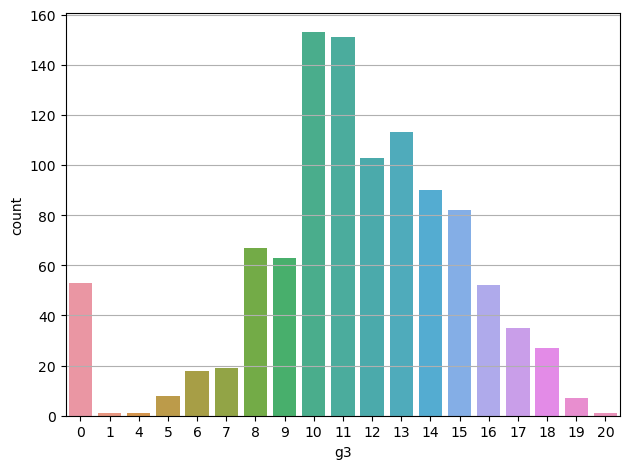

In [17]:
sns.countplot(x='g3', data=data);
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/g3.png")
plt.show()

#### In order to get more clarity, I decided to add a 'grade' column, splitting the 'g3' scores into 6 categories: 
#### 6 (very high), 5 (high), 4 (up mid), 3 (lo mid), 2 (low) and 1 (very low).

In [18]:
def get_grade(val):
    if val <= 4:
        return 1
    elif val <= 7:
        return 2
    elif val <= 10:
        return 3
    elif val <= 13:
        return 4
    elif val <= 16:
        return 5
    else:
        return 6

data['grade'] = data['g3'].apply(get_grade)

#### Counting the values of the 'grade' column

In [19]:
data.value_counts('grade')

grade
4    367
3    283
5    224
6     70
1     55
2     45
dtype: int64

#### Looking at the correlation between the columns and displaying it with a heatmap.

In [20]:
data.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3,grade
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282,-0.120498
medu,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472,0.216688
fedu,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796,0.179591
traveltime,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627,-0.118493
studytime,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629,0.174340
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145,-0.388948
famrel,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461,0.053310
freetime,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890,-0.059474
goout,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877,-0.098528
dalc,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642,-0.139959


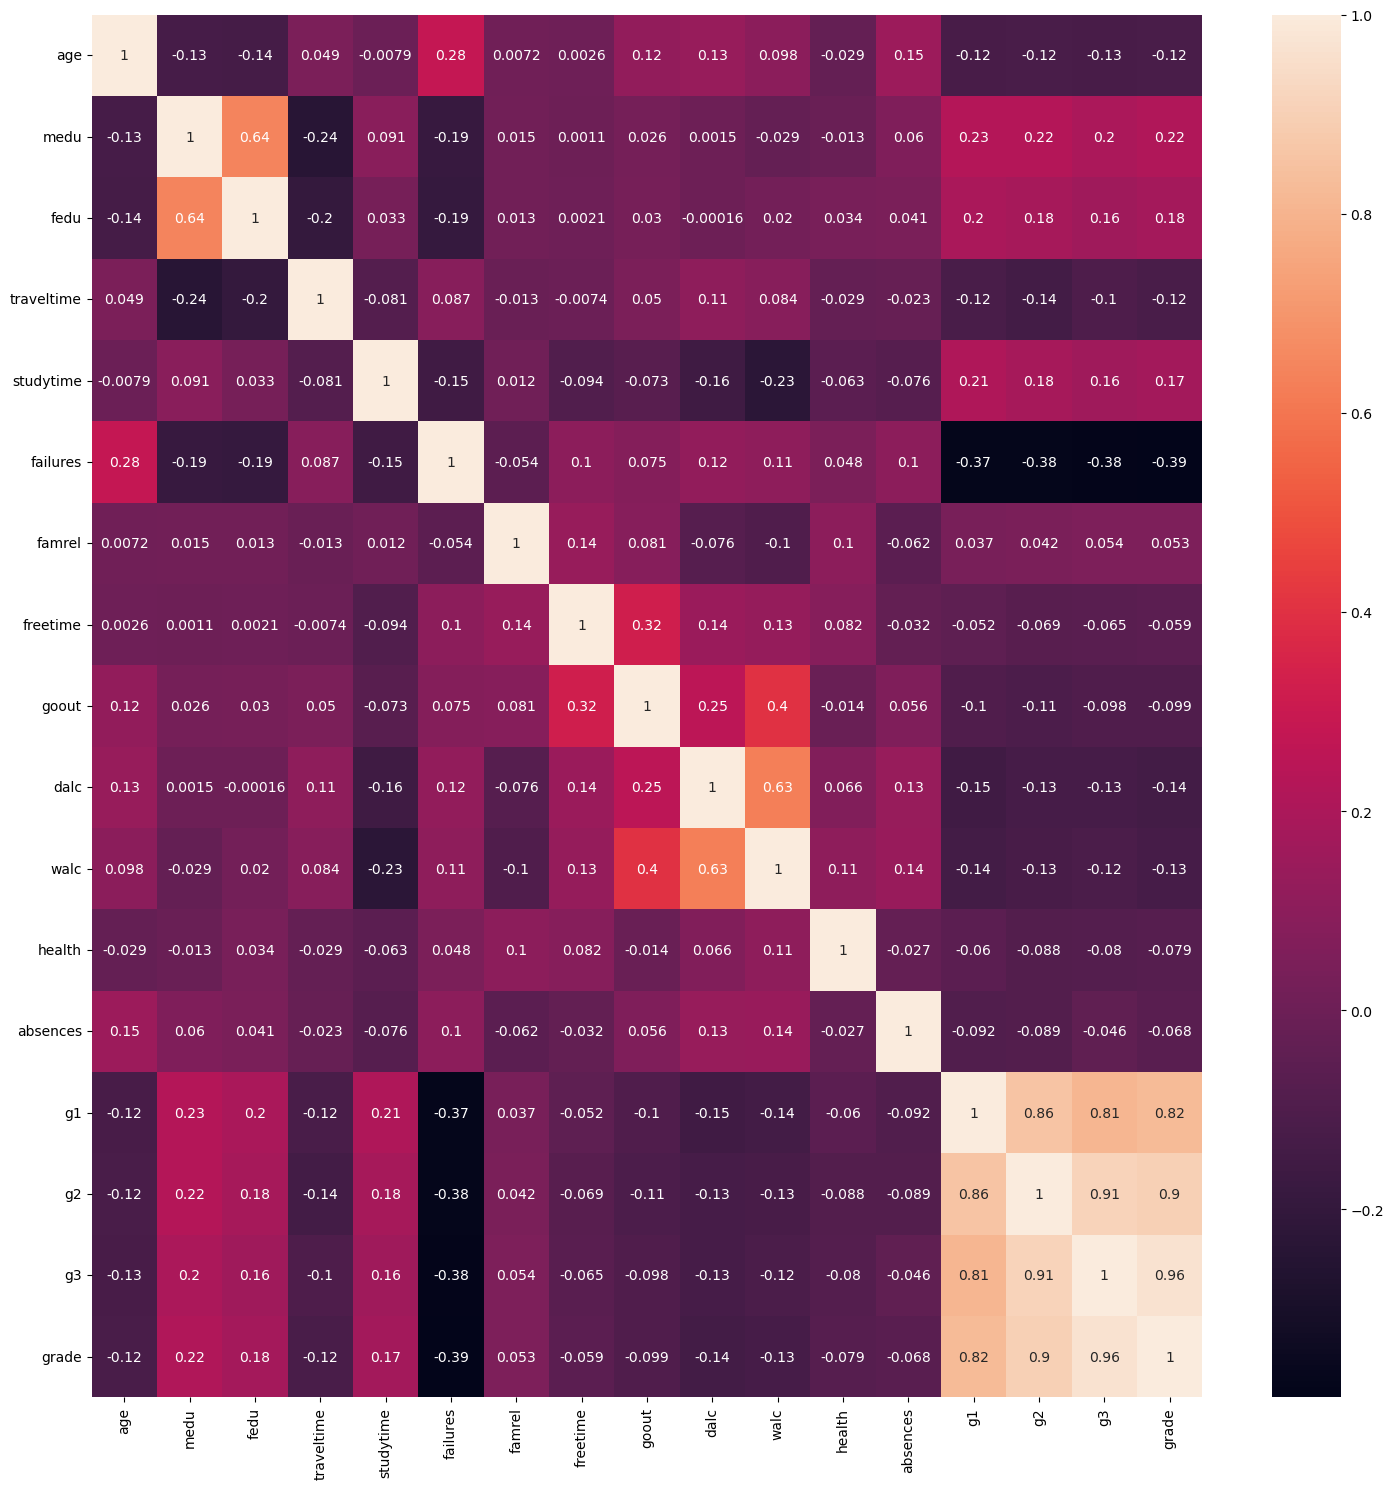

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, ax=ax)
plt.tight_layout()
plt.savefig("../plots/heatmap.png")
plt.show()

#### Result:    There is some expected high correlation between the grade columns (g1, g2, g3, grade), some minor correlation between the parents education (medu, fedu) and some minor correlation between workday- and weekend alcohol consumption (dalc/walc). Apart from that, there is no real correlation at all.

#### Since the 'Age' column is the only one, which is slighly misrepresentative, I decided to drop the rows (14 altogether) concerning the students above the age of 19. 

In [22]:
data['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

In [23]:
data.drop(data[data['age']>=20].index, inplace=True)
data['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
Name: age, dtype: int64

In [24]:
data = data.reset_index(drop=True)
data

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,goout,dalc,walc,health,absences,g1,g2,g3,subject,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,maths,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,maths,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,maths,3
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,maths,5
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,maths,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,MS,F,19,R,GT3,T,2,3,services,other,...,2,1,2,5,4,10,11,10,portuguese,3
1026,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,1,1,1,4,15,15,16,portuguese,5
1027,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,5,6,11,12,9,portuguese,3
1028,MS,M,17,U,LE3,T,3,1,services,services,...,5,3,4,2,6,10,10,10,portuguese,3


### Checking the impact of each column against the grades


#### School - 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira

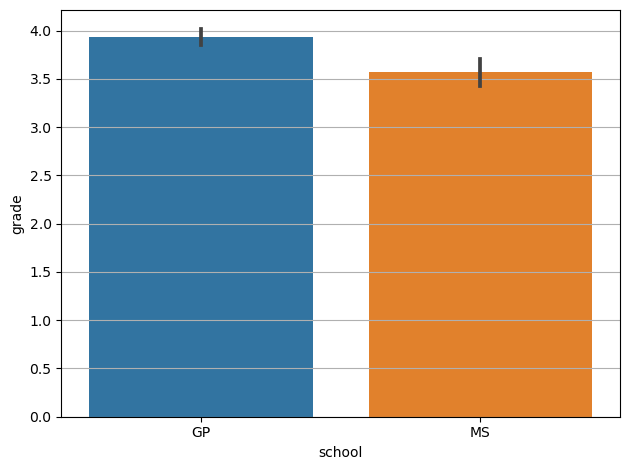

In [25]:
sx = sns.barplot(x='school', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/school_grades.png")
plt.show()

##### Observation: Gabriel Pereira students have a slightly higher average grade than  Mousinho da Silveira students

#### Sex - female or male

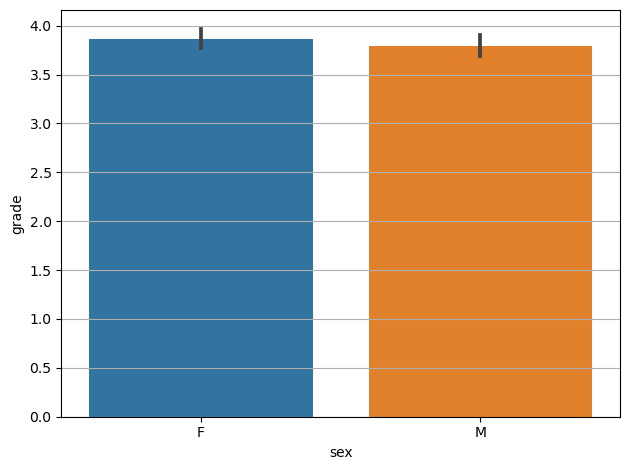

In [26]:
sx = sns.barplot(x='sex', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/sex_grades.png")
plt.show()

##### Observation: Girls perform marginally better than boys.

#### Age - 15 yrs to 19 yrs

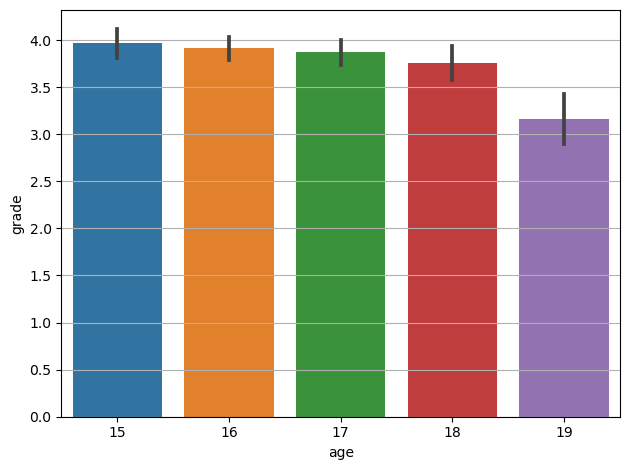

In [27]:
sx = sns.barplot(x='age', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/age_grades.png")
plt.show()

##### Observation:  There is only a marginal drop in the students performance between the age of 15 and 18. A significant drop occurs at the age of 19.

#### Address - urban or rural

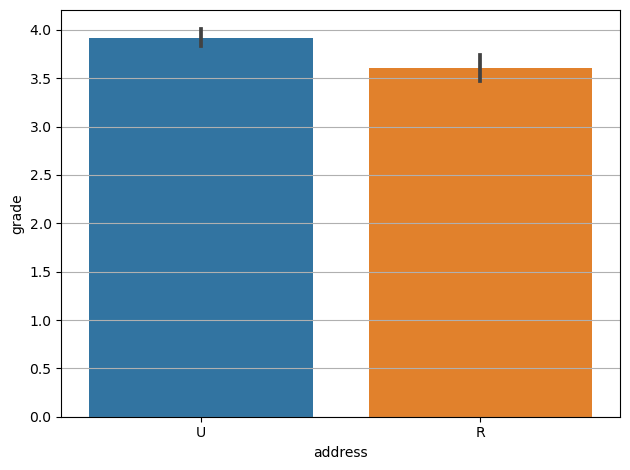

In [28]:
sx = sns.barplot(x='address', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/address_grades.png")
plt.show()

##### Observation: Students from urban areas perform slightly better than students from rural areas.

#### Parents cohabitation status - Apart or Together/ family size - greater than 3 or less or equal 3

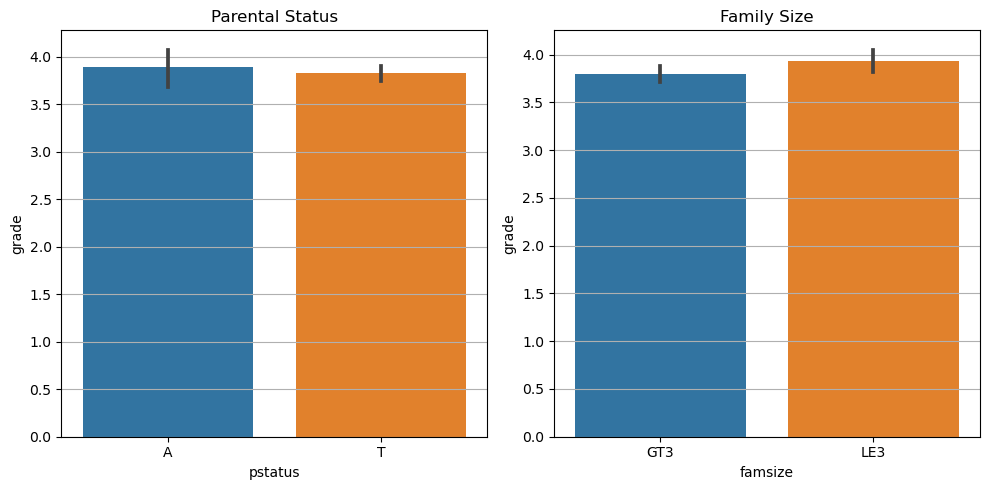

In [29]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = data, y='grade', x='pstatus', ax = ax[0])
sx.set(title = "Parental Status", xlabel = 'pstatus', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = data, y='grade', x='famsize', ax = ax[1])
sx.set(title = "Family Size", xlabel = 'famsize', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/pstatus_famsize_grades.png")
plt.show()

##### Observation: The parental cohabitation status doesn't seem to have a major impact on a student's performance, students who's parents seperated even margenally better grades. Also students who live in families with less than 3 perform marginally better than students from bigger families.

#### Parent's Education - 0 (lowest) to 4 (highest)

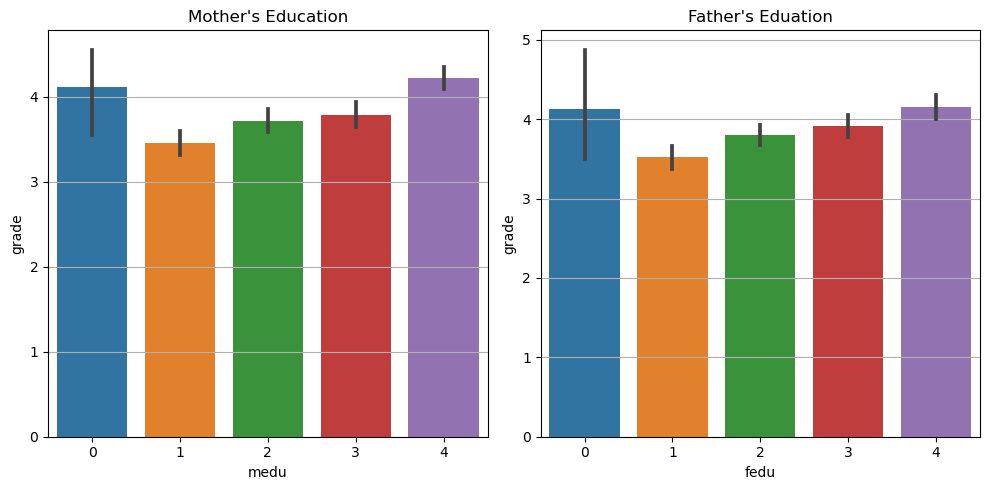

In [30]:
edu_order = [0,1,2,3,4]
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = data, y='grade', x='medu', ax = ax[0], order=edu_order)
sx.set(title = "Mother's Education", xlabel = 'medu', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = data, y='grade', x='fedu', ax = ax[1], order=edu_order)
sx.set(title = "Father's Eduation", xlabel = 'fedu', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/parents_edu_grades.png")
plt.show()

##### Observation: A parent's education seems to have an impact on a student's performance. The student who's parent - mother and father are almost similar - has the highest education status performs marginally better than a student, who's parents have the lowest education status. 

#### Parent's Job Occupation

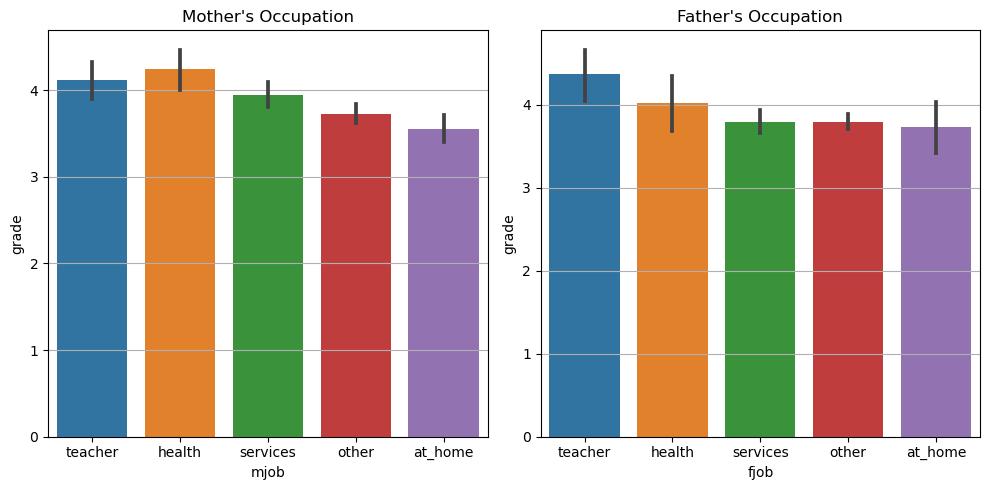

In [31]:
job_order = ['teacher','health', 'services','other', 'at_home']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = data, y='grade', x='mjob', ax = ax[0], order=job_order)
sx.set(title = "Mother's Occupation", xlabel = 'mjob', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = data, y='grade', x='fjob', ax = ax[1], order=job_order)
sx.set(title = "Father's Occupation", xlabel = 'fjob', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/parents_job_grades.png")
plt.show()

##### Observation: The occupation of the students parents seem to have an impact on the students performance. The highest grades a given to students who's parents either teachers or work in the health sector. 

#### Reason for choice of school

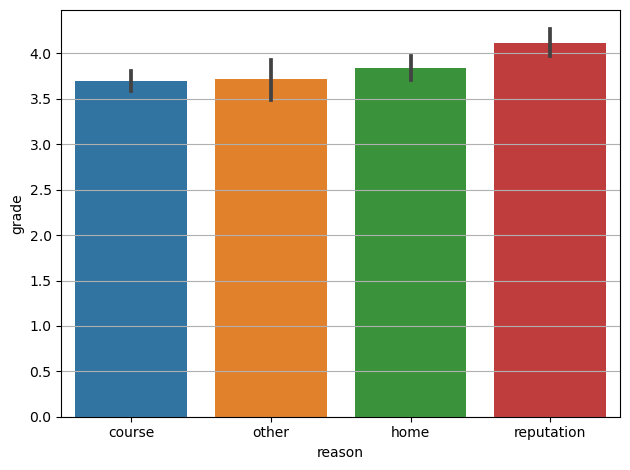

In [32]:
sx = sns.barplot(x='reason', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/reason_grades.png")
plt.show()

##### Observation: The reason for the choice of school has an impact on students performance, with those who chose the school because of it's reputation scoring the highest marks.

#### Guardian

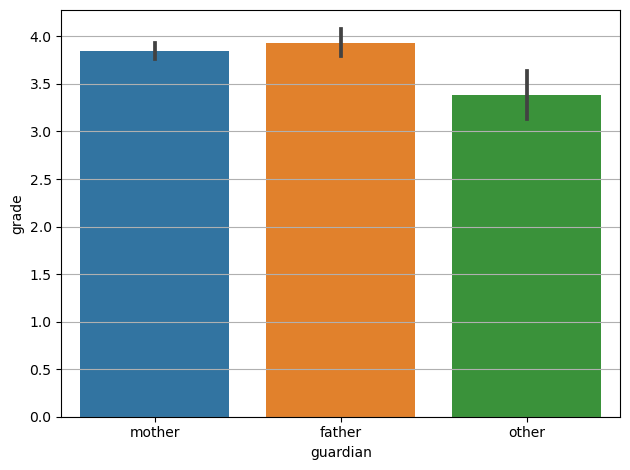

In [33]:
sx = sns.barplot(x='guardian', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/guardian_grades.png")
plt.show()

##### Observation: A student's guardian has an impact on the performance. Students who are overseen by their parents perform stronger than those who's guardian is someone else.

#### Traveltime (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

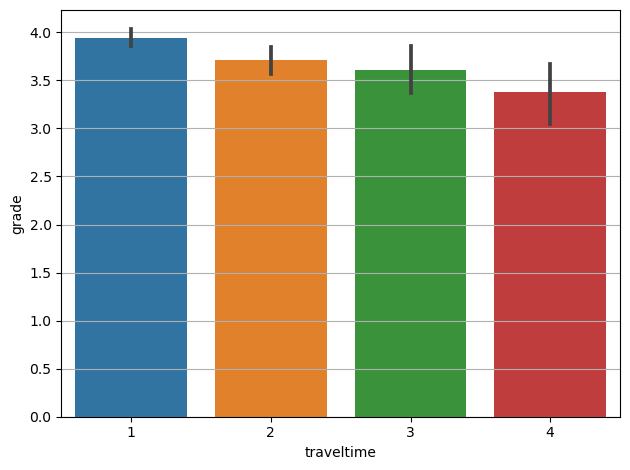

In [34]:
sx = sns.barplot(x='traveltime', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/travel_grades.png")
plt.show()

##### Observation: Commuting seems to have a negative impact on students performance.

#### Studytime (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

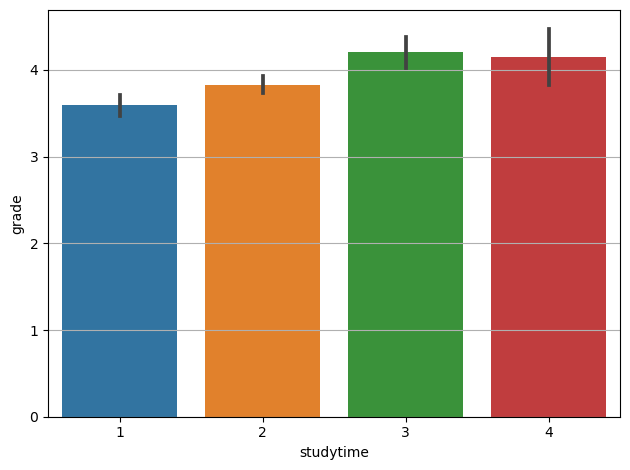

In [35]:
sx = sns.barplot(x='studytime', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/study_grades.png")
plt.show()

##### Observation: Students that spend more time on studying, have the higher grades in general.

#### Past class failures

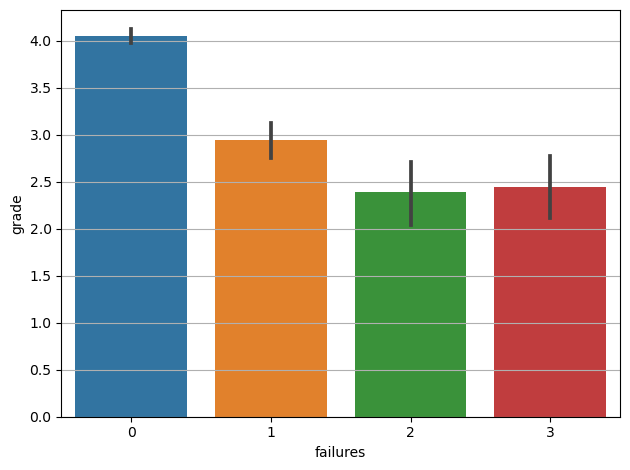

In [36]:
sx = sns.barplot(x='failures', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/fail_grades.png")
plt.show()

##### Observation: Past failures seem to have a decisive negative impact on students performance.

#### Educational Support

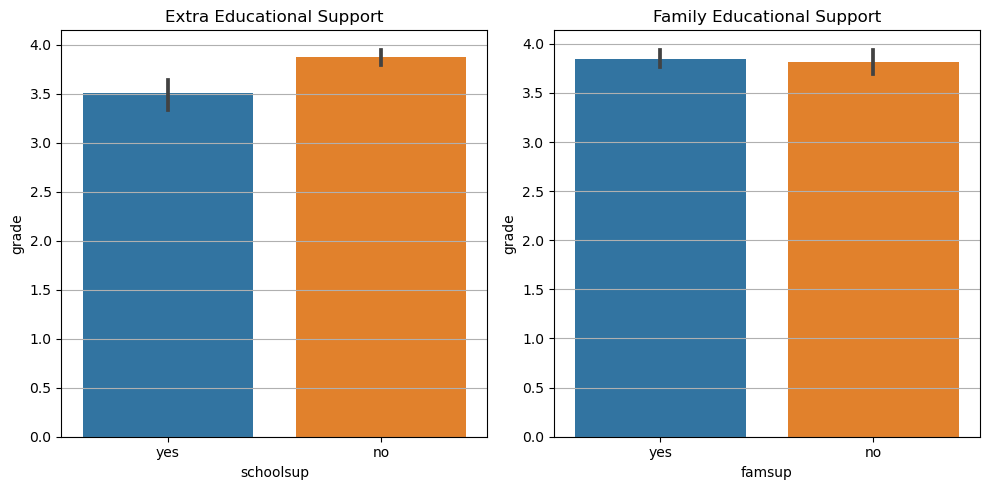

In [37]:
sup_order = ['yes','no']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = data, y='grade', x='schoolsup', ax = ax[0], order=sup_order)
sx.set(title = "Extra Educational Support", xlabel = 'schoolsup', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = data, y='grade', x='famsup', ax = ax[1], order=sup_order)
sx.set(title = "Family Educational Support", xlabel = 'famsup', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/edu_support_grades.png")
plt.show()

##### Observation: Students who get extra educational support, perform worse than the students who do not get extra educational support. On the other hand, students who get family educational support, perform marginally better than those students without.

#### Extra Paid Classes / Extra Curricular Activities

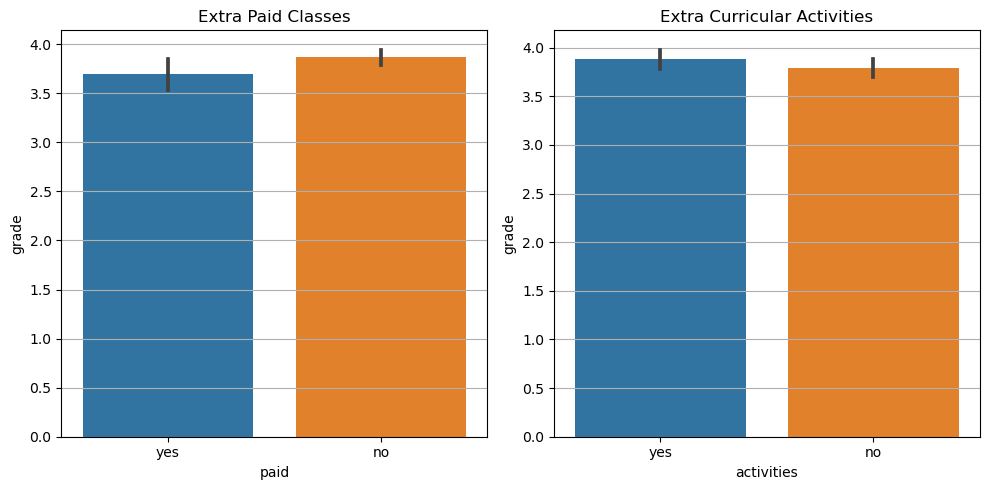

In [38]:
extra_order = ['yes','no']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = data, y='grade', x='paid', ax = ax[0], order=extra_order)
sx.set(title = "Extra Paid Classes", xlabel = 'paid', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = data, y='grade', x='activities', ax = ax[1], order=extra_order)
sx.set(title = "Extra Curricular Activities", xlabel = 'activities', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/extras_grades.png")
plt.show()

##### Observation: Students do not seem to benefit from extra paid classes, where as they do seem to benefit from extra curricular activities.

#### Attended nursery

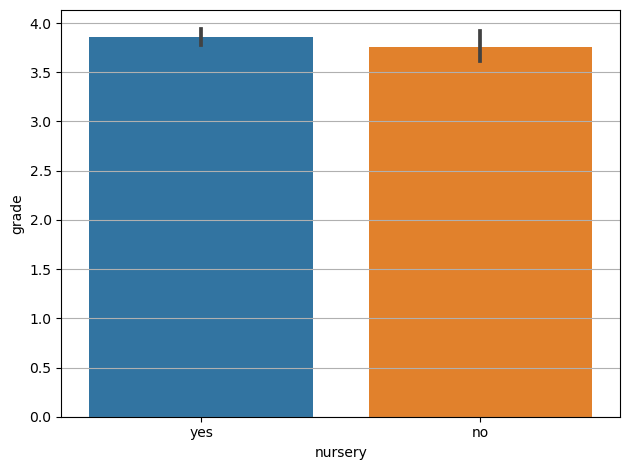

In [39]:
sx = sns.barplot(x='nursery', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/nursery_grades.png")
plt.show()

##### Observation: Whether or not a student attended nursery school does not seem to make a big difference, however those who did attend nursery school perform marginally better.

#### Aiming for higher education

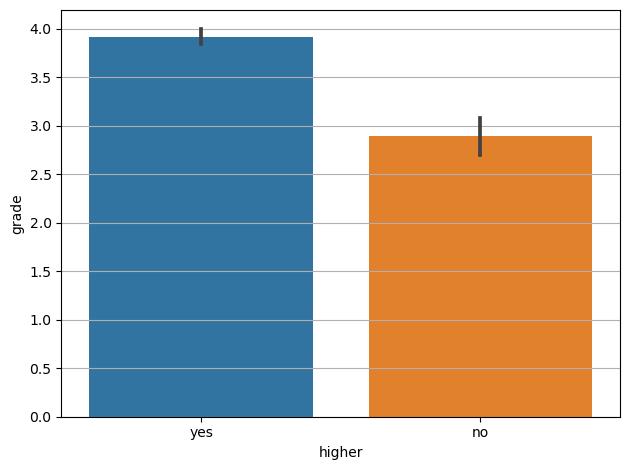

In [40]:
sx = sns.barplot(x='higher', y='grade', data=data)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/higher_grades.png")
plt.show()

##### Observation: The aim for a higher education seems to be a real benefactor for the performance of a student.

#### Internet access

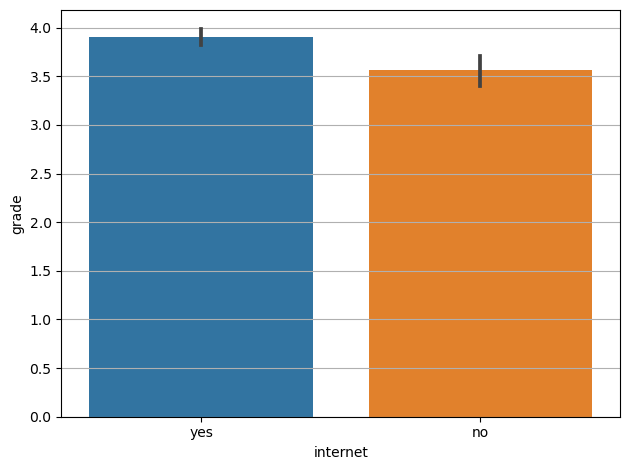

In [41]:
int_order = ['yes','no']
sx = sns.barplot(x='internet', y='grade', data=data, order=int_order)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/internet_grades.png")
plt.show()

##### Observation: Internet access seems to be a benefactor for the performance of a student.

#### Romantically involved

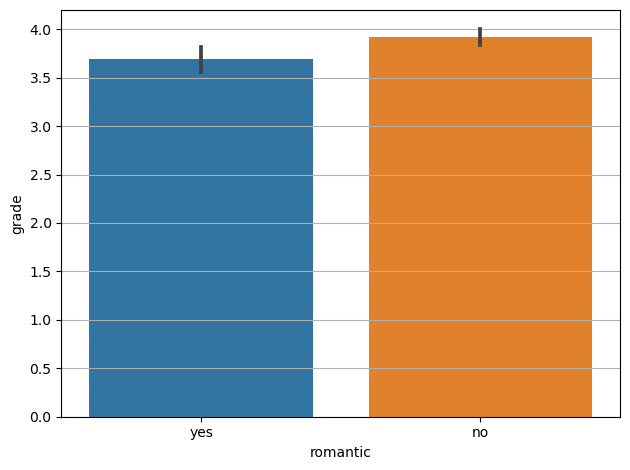

In [42]:
rom_order = ['yes','no']
sx = sns.barplot(x='romantic', y='grade', data=data, order=rom_order)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/romantic_grades.png")
plt.show()

##### Observation: It seems that a romantic relationship does not benefit the performance of a student. Those students who are not romantically involved have the higher grades on average. Then again: The Beatles already said "All you need is Love", so there's no point to argue. 

#### Quality of family relationship (1 - very bad to 5 - excellent)

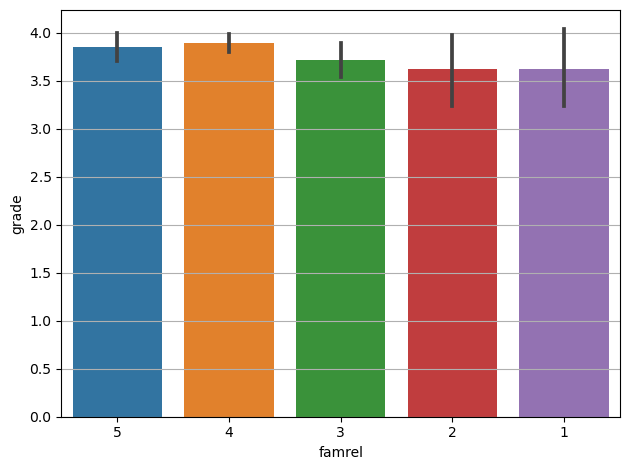

In [43]:
rel_order = [5,4,3,2,1]
sx = sns.barplot(x='famrel', y='grade', data=data, order=rel_order)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/famrel_grades.png")
plt.show()

##### Observation: A good family relationship seems to benefit the students performance, even though it's only marginally.

#### Freetime / going out (1 - very low to 5 - very high)

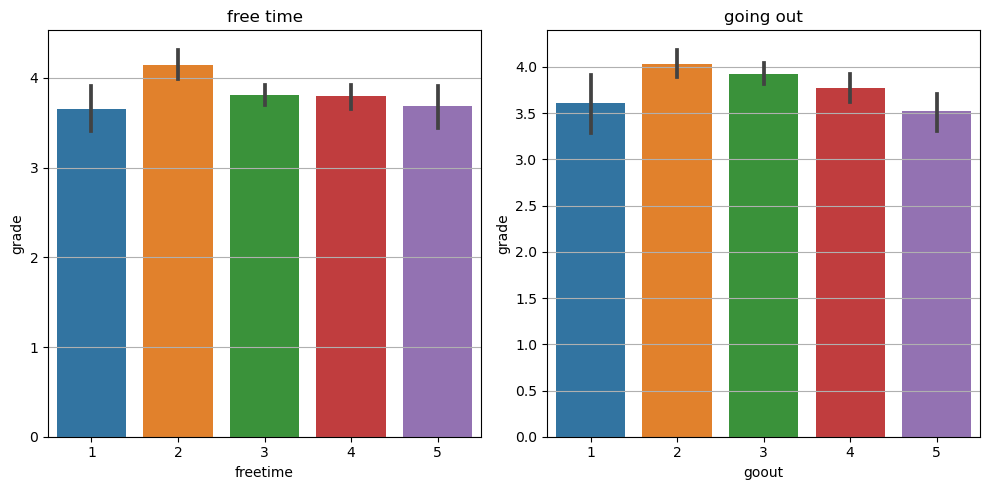

In [44]:
ftgo_order = [1,2,3,4,5]
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = data, y='grade', x='freetime', ax = ax[0], order=ftgo_order)
sx.set(title = "free time", xlabel = 'freetime', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = data, y='grade', x='goout', ax = ax[1], order=ftgo_order)
sx.set(title = "going out", xlabel = 'goout', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/freetime_goout_grades.png")
plt.show()

##### Observation: It appears that some free time, as well as occasionally going out benefits a  students performance.

#### workday/weekend alcohol consumption (1 - very low to 5 - very high)

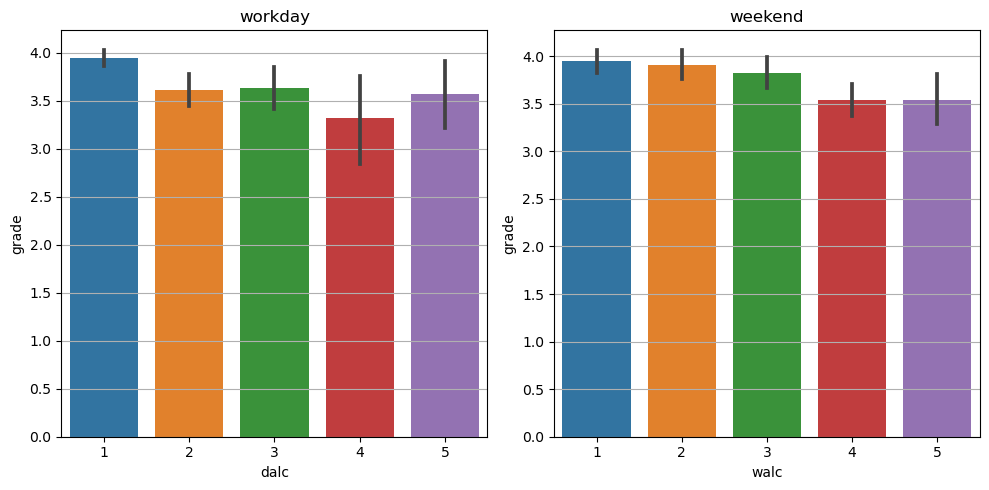

In [45]:
alc_order = [1,2,3,4,5]
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = data, y='grade', x='dalc', ax = ax[0], order=alc_order)
sx.set(title = "workday", xlabel = 'dalc', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = data, y='grade', x='walc', ax = ax[1], order=alc_order)
sx.set(title = "weekend", xlabel = 'walc', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/walc_dalc_grades.png")
plt.show()

##### Observation: It appears that those students with the lowest alcohol consumption have the higher grades.

#### Health status (5 - very good to 1 - very bad)

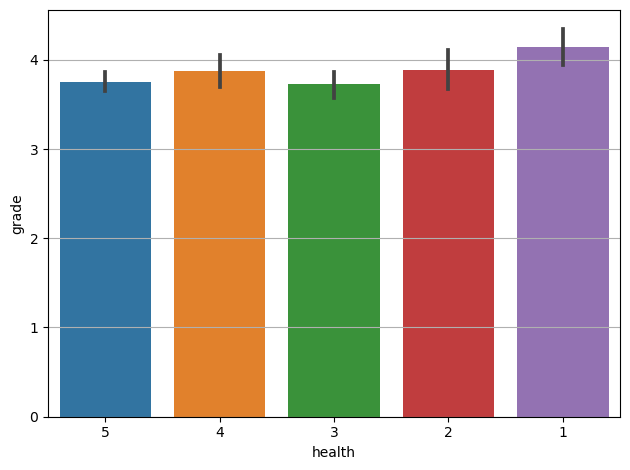

In [46]:
health_order = [5,4,3,2,1]
sx = sns.barplot(x='health', y='grade', data=data, order=health_order)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/health_grades.png")
plt.show()

##### Observation: It appears that those students with the biggest health issues have the higher grades.

#### School absences (0 to 75)

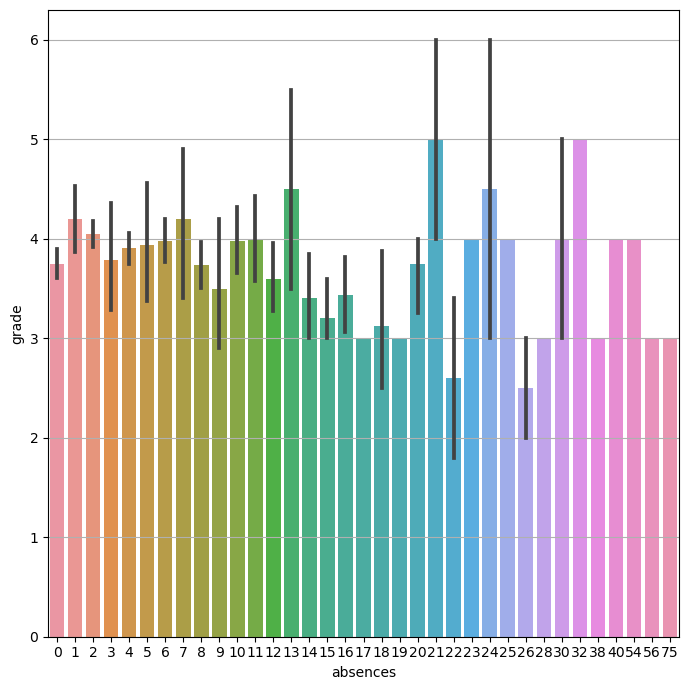

In [47]:
fig, ax = plt.subplots(figsize=(7,7))
sx = sns.barplot(x='absences', y='grade', data=data, ax=ax)
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/absences_grades.png")
plt.show()

##### Observation: It seems that less school absences benefit the overall performance of a student, however there are some exceptions.

### Subject Comparison - Portuguese vs Maths

#### Splitting the data by subject to allow comparison between maths- and portuguese classes. 

In [48]:
maths = data["subject"].isin(["maths"])
mathsdata = data[maths]

port = data["subject"].isin(["portuguese"])
portdata = data[port]

#### Romantically involved

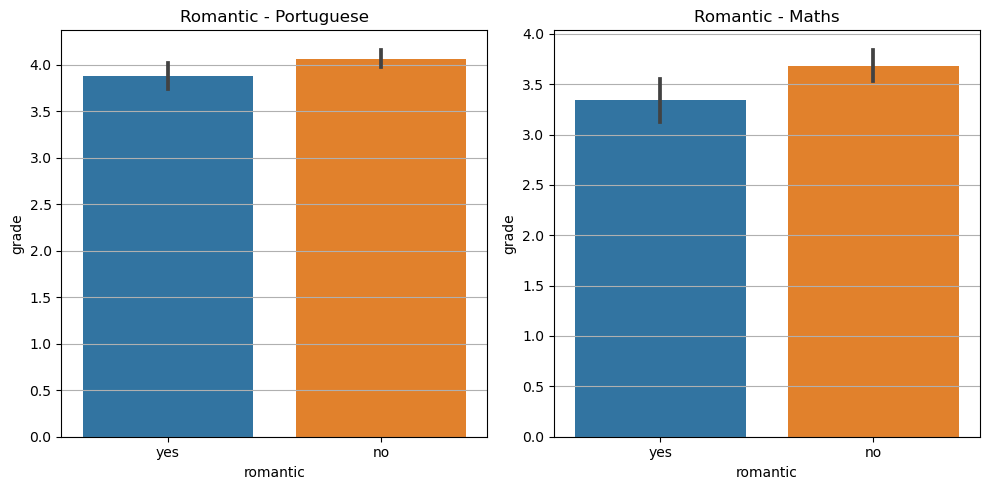

In [49]:
rom_order = ['yes','no']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = portdata, y='grade', x='romantic', ax = ax[0], order=rom_order)
sx.set(title = "Romantic - Portuguese", xlabel = 'romantic', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = mathsdata, y='grade', x='romantic', ax = ax[1], order=rom_order)
sx.set(title = "Romantic - Maths", xlabel = 'romantic', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/romantic_grade_port_maths.png")
plt.show()

##### Observation: It seems that a romantic relationship does not benefit both subjects. And yet: remember the Beatles!

#### Aiming for a higher education

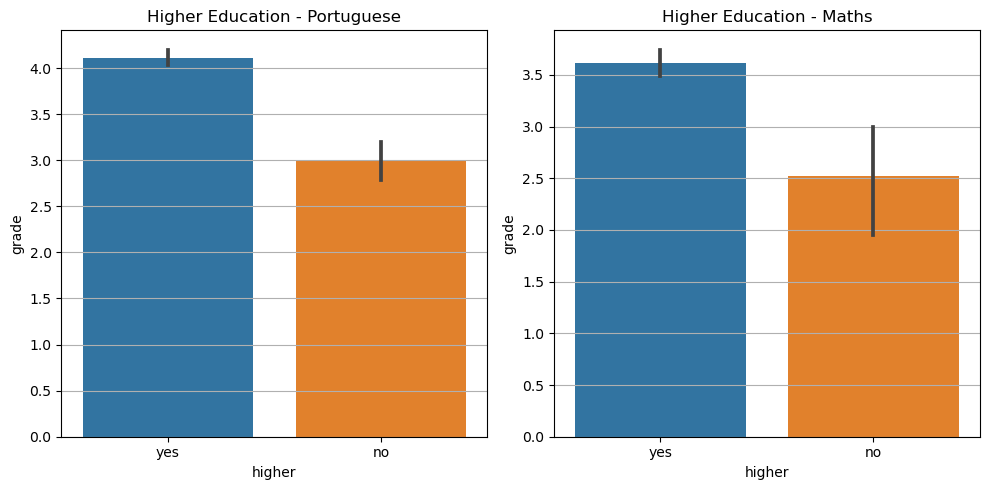

In [50]:
hi_order = ['yes','no']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = portdata, y='grade', x='higher', ax = ax[0], order=hi_order)
sx.set(title = "Higher Education - Portuguese", xlabel = 'higher', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = mathsdata, y='grade', x='higher', ax = ax[1], order=hi_order)
sx.set(title = "Higher Education - Maths", xlabel = 'higher', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/higher_grade_port_maths.png")
plt.show()

##### Observation: It seems that the ambition for a higher education is more beneficial for portuguese students than it is for maths students. Although it remains the same in relation to their peers.

#### Internet access

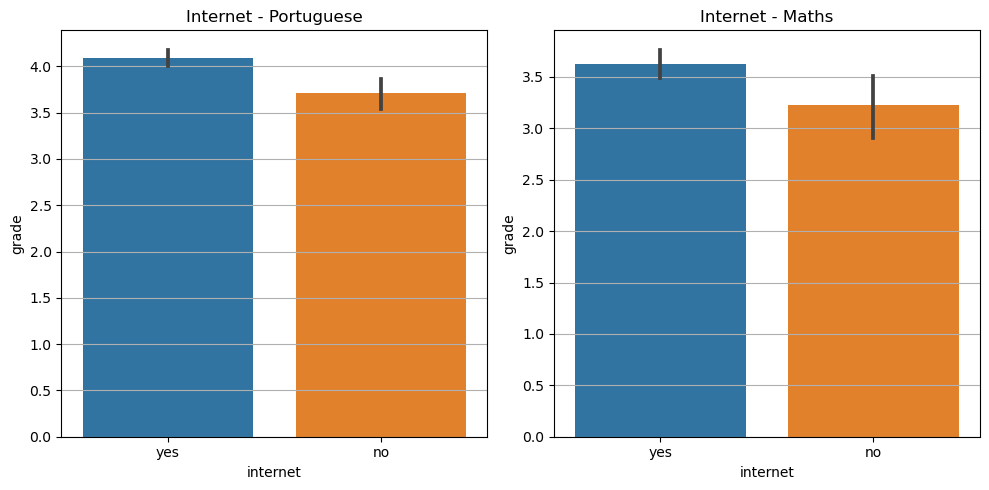

In [51]:
int_order = ['yes','no']
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = portdata, y='grade', x='internet', ax = ax[0], order=int_order)
sx.set(title = "Internet - Portuguese", xlabel = 'internet', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = mathsdata, y='grade', x='internet', ax = ax[1], order=int_order)
sx.set(title = "Internet - Maths", xlabel = 'internet', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/internet_grade_port_maths.png")
plt.show()

##### Observation: It appears that both groups of students benefit from access to the internet.

#### Adding a 'Total Weekly Alcohol Consumption' ('talc') column for comparison.

In [52]:
data['talc'] = data['dalc']*5/7 + data['walc']*2/7
mathsdata['talc'] = mathsdata['dalc']*5/7 + mathsdata['walc']*2/7
portdata['talc'] = portdata['dalc']*5/7 + portdata['walc']*2/7

#### Total weekly alcohol consumption

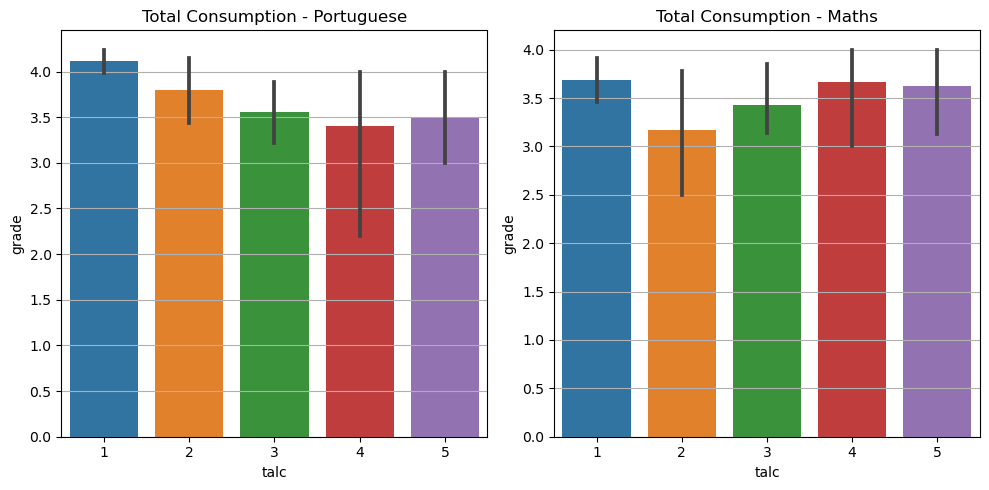

In [53]:
talc_order = [1,2,3,4,5]
fig, ax = plt.subplots(1,2,figsize=(10,5))
sx = sns.barplot(data = portdata, y='grade', x='talc', ax = ax[0], order=talc_order)
sx.set(title = "Total Consumption - Portuguese", xlabel = 'talc', ylabel = 'grade')
sx.grid(axis='y')
sx = sns.barplot(data = mathsdata, y='grade', x='talc', ax = ax[1], order=talc_order)
sx.set(title = "Total Consumption - Maths", xlabel = 'talc', ylabel = 'grade')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/Totalalc_grade_port_maths.png")
plt.show()

##### Observation: Alcohol consumption seems slightly more compatible with 'maths' student than with 'portuguese' students, although the students who's consumption is 'very low' are the ones driving the best results.

## Three more interesting observations

#### How often do the students go out; grouped by age?

In [54]:
data.groupby(['sex', 'age']).agg({'goout':np.mean})

goout
sex age          
F   15   2.673684
    16   3.213836
    17   3.070175
    18   3.267717
    19   3.272727
M   15   2.929293
    16   3.122951
    17   3.518868
    18   3.421053
    19   3.000000

##### Observation: Overall male and female students seem to go out equally often. with male students going out more often at the 17 and 18, female students at the age of 16 and 19.

#### What's the average alcohol consumption of students by age? 

In [55]:
data.groupby(['sex', 'age']).agg({'walc':np.mean})

walc
sex age          
F   15   1.873684
    16   1.968553
    17   2.035088
    18   1.818898
    19   2.030303
M   15   2.050505
    16   2.614754
    17   3.188679
    18   3.168421
    19   2.130435

##### Observation: The boys increase their weekend alcohol consumption from the age of 15, and drink the most at the age of 17 and 18. The girls consume less alcohol than the boys until the age of 19, when both genders weekend alcohol consumption just differs marginally.

#### What is the average age for students with the ambition to get a higher education?

In [56]:
data.groupby(['sex', 'higher']).agg({'age':np.mean})

age
sex higher           
F   no      17.526316
    yes     16.678245
M   no      17.521739
    yes     16.491228

##### Observation: Both genders are more ambitious when they are younger on average. The numbers are so similar, there is hardly any gender gap to detect.

## Hypothesis:

#### 1. Weekly alcohol consumption of Students between 16 and 18 is low (2). (two-sided)

In [57]:
# confidence level = 0,95
# H0: sample_mean != 2
# H1: sample_mean == 2

sample = data[(data['age']>=16) & (data['age']<=18)]['talc'] 
sample_mean = np.mean(sample)
alpha = 0.05
t_statistic    = (sample_mean - 2) / (np.std(sample,ddof=1) / np.sqrt(len(sample)))
lower_critical = st.t.ppf((alpha/2), df=len(sample)-1)
upper_critical = st.t.ppf(1-(alpha/2), df=len(sample)-1)

print(f"Lower critical: {lower_critical}")
print(f"Statistic:      {t_statistic}")
print(f"Upper critical: {upper_critical}")

Lower critical: -1.963013918658834
Statistic:      -7.551796787386822
Upper critical: 1.9630139186588336


#### Result: Since the statistic is NOT between the restriction areas, H0 is accepted. The hypothesis that Alcohol consumption of students between 16 and 18 is low (2), is correct.

#### 2. Girls drink less alcohol, if their parents live together. (left-sided)

In [58]:
# confidence level = 0,95
# H0: sample_mean >= 2
# H1: sample_mean < 2

sample = data[(data['sex']=='F') & (data['pstatus']== 'T')]['talc'] 
stat, pval = st.ttest_1samp(sample, popmean=2, alternative="less")

print(f"Statistic: {stat}")
print(f"Pval:      {pval}")

Statistic: -18.45209872163055
Pval:      7.64991204256906e-59


#### Result: Since the p-value ist bigger than the left sided restriction area, H0 is rejected. The hypothesis that the alcohol consumption of girls is less than low (2), is correct.

#### 3. Urban boys drink more alcohol than rural boys. (right-sided)

In [59]:
# confidence level = 0,95
# H0: sample_mean <= 3
# H1: sample_mean > 3

sample = data[(data['address']=='U') & (data['sex']== 'M')]['talc'] 
stat, pval = st.ttest_1samp(sample, popmean=3, alternative="greater")

print(f"Statistic: {stat}")
print(f"Pval:      {pval}")

Statistic: -17.411553980848048
Pval:      1.0


#### Result: Since the p-value ist bigger than 0.95 (confidence level), H0 is accepted. The hypothesis that urban boys consume more alcohol  than boys from rural areas is incorrect.

### Save merged data

In [60]:
data.to_csv(config['data']['merged_clean'], index=False)